In this assignment you will model and solve several variants of a sourcing problem where a buyer is subject to both demand and supply uncertainty. The following code block imports some libraries that may be useful.

In [1]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pulp
import seaborn as sns
sns.set_style('whitegrid')

The focus of this assignment is on modeling the supply uncertainty. Thus, I will simplfy the modeling of demand uncertainty. The following code block defines a fucntion that generate a demand sample for a specified number of scenarios.

In [2]:
def generate_demand_sample(scenarios):
    
    np.random.seed(0)
    return np.random.poisson(1000, size = scenarios)

The following code block demonstrates the use of the function.

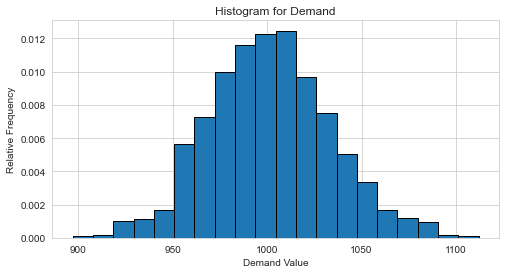

In [3]:
scenarios = 1000

demand_sample = generate_demand_sample(scenarios)

fig, ax = plt.subplots(1, 1, sharey = True, figsize = (8,4))
ax.hist(demand_sample,
        bins = 20,
        edgecolor = 'k',
        density = True)
ax.set_title('Histogram for Demand')
ax.set_xlabel('Demand Value')
ax.set_ylabel('Relative Frequency')
plt.show()

The following code block reads in and prints the first five rows of the supplier delivery data. The data includes 1000 observations for the on-time delivery of a set of seven suppliers. You will model yield uncertainty as well, but I would like for you to simply assume that all suppliers are subject to a yield distribution that is uniformly distributed between $0.8$ and $1.0$ (more details shortly).

In [4]:
data_path = pathlib.Path('data','data.csv')
data = pd.read_csv(data_path)
data.head()

,Supplier_1,Supplier_2,Supplier_3,Supplier_4,Supplier_5,Supplier_6,Supplier_7
0,1,1,1,1,1,1,1
1,1,1,1,1,1,0,1
2,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1


Assume that the unit costs for the seven suppliers is specified by the following `unit_cost` object, where the values correspond to `Supplier_1`, $\ldots$, `Supplier_6`, `Supplier_7`. Assume that the sales_prices is 2.00.

In [5]:
unit_costs = np.array([0.7 , 0.83, 1.01, 0.93, 0.73, 0.86, 0.85])
sales_price = 2

Use the data set to:
1. Define and solve an optimization model that maximizes the buying firms expected profit when only considering the on-time delivery rate for each supplier,
2. Define and solve an optimization model that maximizes the buying firms expected profit when considering the on-time delivery rate and yield rate for each supplier, and 
3. Define and solve an optimization model that maximizes the buying firms expected profit when considering the on-time delivery rate and yield rate for each supplier under the assumption that the buying firm suspects that groups of the available suppliers are subject to correlated supply disruptions that affect the on-time delivery rate only. **In addition to solving the problem, you need to choose your grouping and justify your choice.**

When modeling yield uncertainty, assume that all suppliers are subject to a yield distribution that is uniformly distributed between $0.8$ and $1.0$. Thus, you may simply use `np.random.uniform(low = 0.8, high = 1.0, size=**SPECIFY**)` to generate random yield values. Also, use 2000 scenarios for all stochastic modeling approaches.

For each problem, clearly print out or state the optimal sourcing strategy, i.e., how much should be ordered from each supplier. For part 3, justify your decision for the supplier grouping that you use. Use markdown and code cells to communicate all major steps and assumptions made during your analysis.

The total points will be distributed as follows:

**Task 1 (30 pts)**:
- Generating appropriate samples for the on-time delivery performance of each supplier (10 pts)
- Defining an appropriate optimization model (10 pts)
- Obtaining a reasonable solution (10 pts)

**Task 2 (30 pts)**:
- Generating appropriate samples for the on-time delivery performance of each supplier (10 pts)
- Defining an appropriate optimization model (10 pts)
- Obtaining a reasonable solution (10 pts)

**Task 3 (40 pts)**:
- Appropriate supplier grouping (10 pts)
- Generating appropriate samples for the on-time delivery performance of each supplier (10 pts)
- Defining an appropriate optimization model (10 pts)
- Obtaining a reasonable solution (10 pts)